### Import libraries and programs

In [2]:
pip install --upgrade scipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

### Import files as df

In [5]:
final_demo = 'df_final_demo.txt'
final_web_data_pt1 = 'df_final_web_data_pt_1.txt'
final_web_data_pt2 = 'df_final_web_data_pt_2.txt'
final_experiment_clients = 'df_final_experiment_clients.txt'

In [6]:
df_demo = pd.read_csv(final_demo, delimiter=',')  # Use '\t' for tab-delimited data
df_web_pt1 = pd.read_csv(final_web_data_pt1, delimiter=',')
df_web_pt2 = pd.read_csv(final_web_data_pt2, delimiter=',')
df_experiment = pd.read_csv(final_experiment_clients, delimiter=',')

### Join pt1 and pt2 (WEB) and quick analysis of the dfs 

In [8]:
print(df_demo.shape, df_web_pt1.shape, df_web_pt2.shape, df_experiment.shape)


(70609, 9) (343141, 5) (412264, 5) (70609, 2)


In [9]:
df_web = pd.concat([df_web_pt1, df_web_pt2], ignore_index=True)
df_web.shape

(755405, 5)

In [10]:
df_web = df_web.drop_duplicates()
df_web.shape

(744641, 5)

In [11]:
# df_demo
# df_web
# df_experiment

In [12]:
column_summary_df_demo = pd.DataFrame({
    'Column Name': df_demo.columns,
    'Data Type': df_demo.dtypes.values,
    'Percentage Null': df_demo.isnull().mean().values * 100,
    'Unique Values': df_demo.nunique().values
})

print(column_summary_df_demo)

        Column Name Data Type  Percentage Null  Unique Values
0         client_id     int64         0.000000          70609
1    clnt_tenure_yr   float64         0.019828             54
2  clnt_tenure_mnth   float64         0.019828            482
3          clnt_age   float64         0.021244            165
4             gendr    object         0.019828              4
5         num_accts   float64         0.019828              8
6               bal   float64         0.019828          70328
7      calls_6_mnth   float64         0.019828              8
8     logons_6_mnth   float64         0.019828              9


In [13]:
column_summary_df_web = pd.DataFrame({
    'Column Name': df_web.columns,
    'Data Type': df_web.dtypes.values,
    'Percentage Null': df_web.isnull().mean().values * 100,
    'Unique Values': df_web.nunique().values
})

print(column_summary_df_web)

    Column Name Data Type  Percentage Null  Unique Values
0     client_id     int64              0.0         120157
1    visitor_id    object              0.0         130236
2      visit_id    object              0.0         158095
3  process_step    object              0.0              5
4     date_time    object              0.0         629363


In [14]:
column_summary_df_experiment = pd.DataFrame({
    'Column Name': df_experiment.columns,
    'Data Type': df_experiment.dtypes.values,
    'Percentage Null': df_experiment.isnull().mean().values * 100,
    'Unique Values': df_experiment.nunique().values
})

print(column_summary_df_experiment)

  Column Name Data Type  Percentage Null  Unique Values
0   client_id     int64         0.000000          70609
1   Variation    object        28.479372              2


### Join dfs

In [16]:
df_demo_ex = pd.merge(df_demo, df_experiment, on='client_id', how='inner')
df_demo_ex.shape

(70609, 10)

In [17]:
df_total = pd.merge(df_web, df_demo_ex, on='client_id', how='left')
df_total.shape

(744641, 14)

In [18]:
column_summary_df_total = pd.DataFrame({
    'Column Name': df_total.columns,
    'Data Type': df_total.dtypes.values,
    'Percentage Null': df_total.isnull().mean().values * 100,
    'Unique Values': df_total.nunique().values
})
#column_summary_df_total.to_excel('column_summary_df_total.xlsx', index=False)
print(column_summary_df_total)

         Column Name Data Type  Percentage Null  Unique Values
0          client_id     int64         0.000000         120157
1         visitor_id    object         0.000000         130236
2           visit_id    object         0.000000         158095
3       process_step    object         0.000000              5
4          date_time    object         0.000000         629363
5     clnt_tenure_yr   float64        40.402959             54
6   clnt_tenure_mnth   float64        40.402959            482
7           clnt_age   float64        40.404571            165
8              gendr    object        40.402959              4
9          num_accts   float64        40.402959              8
10               bal   float64        40.402959          70328
11      calls_6_mnth   float64        40.402959              8
12     logons_6_mnth   float64        40.402959              9
13         Variation    object        57.397592              2


### Normalization, elimination of duplicates, creation of columns for clarity and division of df_total

In [20]:
unique_process_steps = df_total['process_step'].unique()
print(unique_process_steps)

['step_3' 'step_2' 'step_1' 'start' 'confirm']


In [21]:
# Create a dictionary to map 'process_step' values to integers
step_to_num = {
    'start': 0,
    'step_1': 1,
    'step_2': 2,
    'step_3': 3,
    'confirm': 4
}

# Create the new column 'process_step_num' by mapping 'process_step' values
df_total['process_step_num'] = df_total['process_step'].map(step_to_num)

# Display the first few records to verify
print(df_total[['process_step', 'process_step_num']].head())

  process_step  process_step_num
0       step_3                 3
1       step_2                 2
2       step_3                 3
3       step_2                 2
4       step_3                 3


In [22]:
df_total['date_time'] = pd.to_datetime(df_total['date_time'])

In [23]:
df_total = df_total.drop_duplicates()

### df_TOTAL: Data frame merge between web, demo and experiment
### df: Data frame WHIT A/B test values
### df2: Data frame WHITHOUT A/B test values

In [25]:
# DataFrame with rows where 'Variation' values are not null
df = df_total[df_total['Variation'].notna()]

# DataFrame with rows where 'Variation' values are null
df2 = df_total[df_total['Variation'].isna()]

In [26]:
print(df.shape, df2.shape)


(317235, 15) (427406, 15)


In [27]:
column_summary_df = pd.DataFrame({
    'Column Name': df.columns,
    'Data Type': df.dtypes.values,
    'Percentage Null': df.isnull().mean().values * 100,
    'Unique Values': df.nunique().values
})
# column_summary_df.to_excel('column_summary_df.xlsx', index=False)
print(column_summary_df)

         Column Name       Data Type  Percentage Null  Unique Values
0          client_id           int64         0.000000          50500
1         visitor_id          object         0.000000          56011
2           visit_id          object         0.000000          69205
3       process_step          object         0.000000              5
4          date_time  datetime64[ns]         0.000000         283344
5     clnt_tenure_yr         float64         0.031522             53
6   clnt_tenure_mnth         float64         0.031522            469
7           clnt_age         float64         0.035305            158
8              gendr          object         0.031522              4
9          num_accts         float64         0.031522              7
10               bal         float64         0.031522          50312
11      calls_6_mnth         float64         0.031522              7
12     logons_6_mnth         float64         0.031522              7
13         Variation          obje

In [28]:
# df_total.to_csv('df_total.csv', index=False)

## Exploratory Data Analysis

### Demo Data

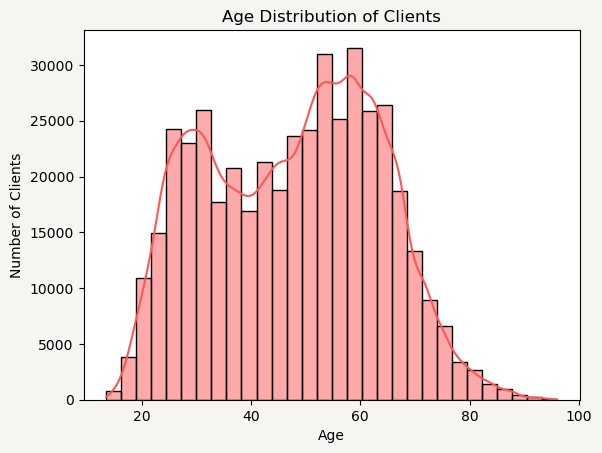

In [31]:
# Set background color
fig, ax = plt.subplots(facecolor='#f7f5f2')

# Create the histogram plot with specified colors
sns.histplot(
    df_total["clnt_age"],
    bins=30,
    kde=True,
    color='#ff5757',  # Color for the bars
    ax=ax,
    line_kws={'color': '#d44d4d'}  # Darker tone for the KDE curve
)

# Customize the plot
ax.set_title("Age Distribution of Clients")
ax.set_xlabel("Age")
ax.set_ylabel("Number of Clients")

# Display the plot
plt.show()

C:\Users\barba\AppData\Local\Temp\ipykernel_12208\2004790454.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\barba\AppData\Local\Temp\ipykernel_12208\2004790454.py:14: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


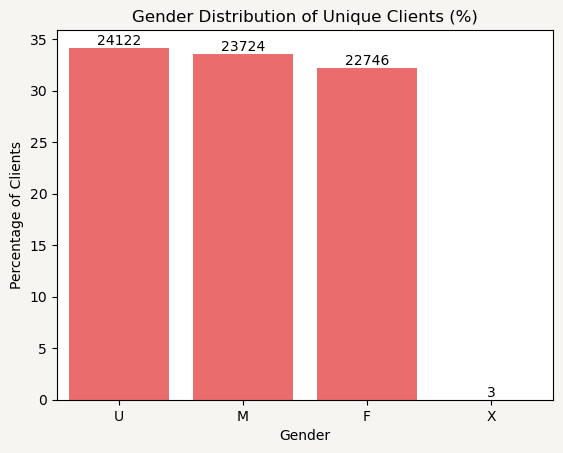

In [32]:
# First, remove duplicates based on 'client_id'
df_unique_clients = df_total.drop_duplicates(subset='client_id')

# Calculate gender distribution in numbers and percentages
gender_counts = df_unique_clients['gendr'].value_counts()
gender_percentages = gender_counts / gender_counts.sum() * 100

# Convert the results into a DataFrame to use in the bar chart
df_gender = pd.DataFrame({'Gender': gender_counts.index, 'Count': gender_counts.values, 'Percentage': gender_percentages.values})

# Create the bar chart using percentages
fig, ax = plt.subplots(facecolor='#f7f5f2')

sns.barplot(
    data=df_gender,
    x='Gender',
    y='Percentage',
    ax=ax,
    palette=['#ff5757']  # Palette with the specified color
)

# Add labels on top of each bar
for index, row in df_gender.iterrows():
    ax.text(
        index, row["Percentage"], f'{row["Count"]}', 
        color='black', ha="center", va="bottom"
    )

# Customize the chart
ax.set_title("Gender Distribution of Unique Clients (%)")
ax.set_xlabel("Gender")
ax.set_ylabel("Percentage of Clients")

# Show the chart
plt.show()

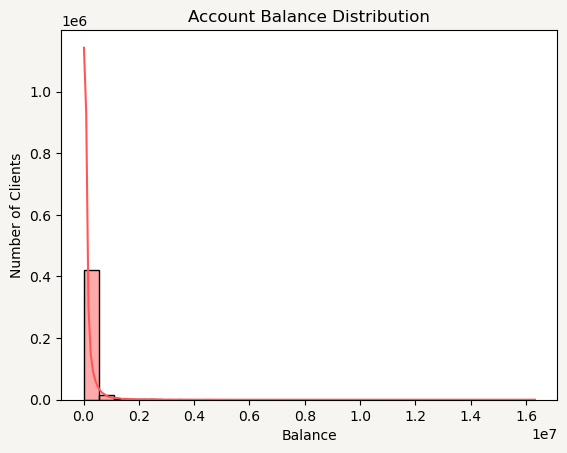

In [33]:
# Set the background color
fig, ax = plt.subplots(facecolor='#f7f5f2')

# Create the histogram plot for account balance
sns.histplot(
    df_total["bal"],
    bins=30,
    kde=True,
    color='#ff5757',  # Color for the bars
    ax=ax,
    line_kws={'color': '#d44d4d'}  # Darker tone for the KDE curve
)

# Customize the plot
ax.set_title("Account Balance Distribution")
ax.set_xlabel("Balance")
ax.set_ylabel("Number of Clients")

# Display the plot
plt.show()

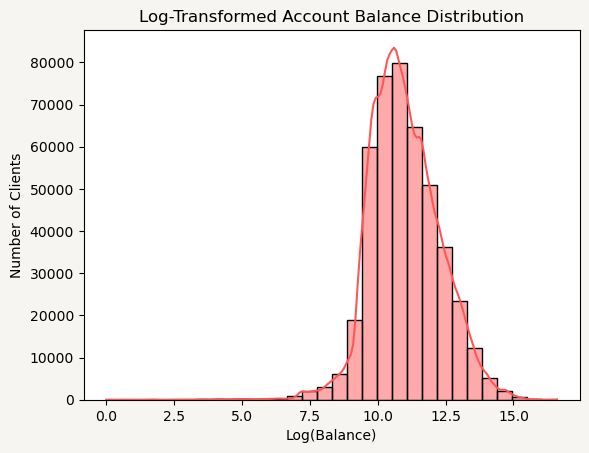

In [34]:
# Transform the data using the natural logarithm
# First, ensure all values are positive.
# If there are negative values or zeros, consider shifting the values.
df_total['log_bal'] = np.log(df_total['bal'] + 1 - df_total['bal'].min())

# Set the background color
fig, ax = plt.subplots(facecolor='#f7f5f2')

# Create the histogram plot for log-transformed account balance
sns.histplot(
    df_total["log_bal"],
    bins=30,
    kde=True,
    color='#ff5757',
    ax=ax,
    line_kws={'color': '#d44d4d'}
)

# Customize the plot
ax.set_title("Log-Transformed Account Balance Distribution")
ax.set_xlabel("Log(Balance)")
ax.set_ylabel("Number of Clients")

# Display the plot
plt.show()

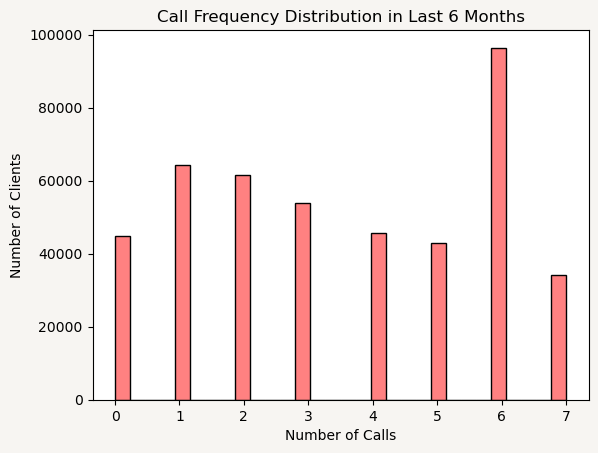

In [35]:
# Set the background color
fig, ax = plt.subplots(facecolor='#f7f5f2')

# Create the histogram plot without the KDE curve
sns.histplot(
    df_total["calls_6_mnth"],
    bins=30,
    kde=False,  # Remove KDE curve
    color='#ff5757',  # Color for the bars
    ax=ax
)

# Customize the plot
ax.set_title("Call Frequency Distribution in Last 6 Months")
ax.set_xlabel("Number of Calls")
ax.set_ylabel("Number of Clients")

# Display the plot
plt.show()

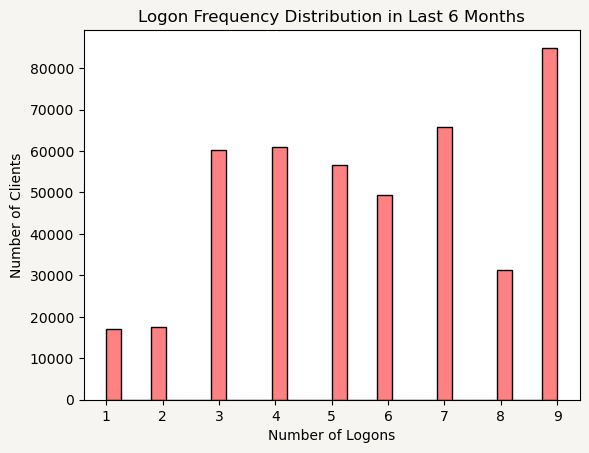

In [36]:
# Set the background color
fig, ax = plt.subplots(facecolor='#f7f5f2')

# Create the histogram plot without the KDE curve
sns.histplot(
    df_total["logons_6_mnth"],
    bins=30,
    kde=False,  # Remove KDE curve
    color='#ff5757',  # Color for the bars
    ax=ax
)

# Customize the plot
ax.set_title("Logon Frequency Distribution in Last 6 Months")
ax.set_xlabel("Number of Logons")
ax.set_ylabel("Number of Clients")

# Display the plot
plt.show()

### Experiment Data

C:\Users\barba\AppData\Local\Temp\ipykernel_12208\1200466548.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\barba\AppData\Local\Temp\ipykernel_12208\1200466548.py:14: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


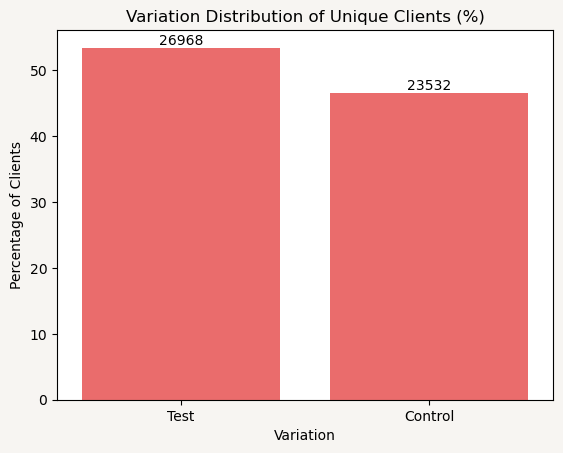

In [38]:
# Remove duplicates to ensure we have a unique client_id
df_unique_clients = df_total.drop_duplicates(subset='client_id')

# Calculate the distribution of the 'Variation' column in numbers and percentages
variation_counts = df_unique_clients['Variation'].value_counts()
variation_percentages = variation_counts / variation_counts.sum() * 100

# Create a DataFrame to use in the bar chart
df_variation = pd.DataFrame({'Variation': variation_counts.index, 'Count': variation_counts.values, 'Percentage': variation_percentages.values})

# Create the bar chart
fig, ax = plt.subplots(facecolor='#f7f5f2')

sns.barplot(
    data=df_variation,
    x='Variation',
    y='Percentage',
    ax=ax,
    palette=['#ff5757']  # Palette with the specified color
)

# Add labels on top of each bar with the number of clients
for index, row in df_variation.iterrows():
    ax.text(
        index, row["Percentage"], f'{row["Count"]}', 
        color='black', ha="center", va="bottom"
    )

# Customize the chart
ax.set_title("Variation Distribution of Unique Clients (%)")
ax.set_xlabel("Variation")
ax.set_ylabel("Percentage of Clients")

# Show the chart
plt.show()

### WEB Data

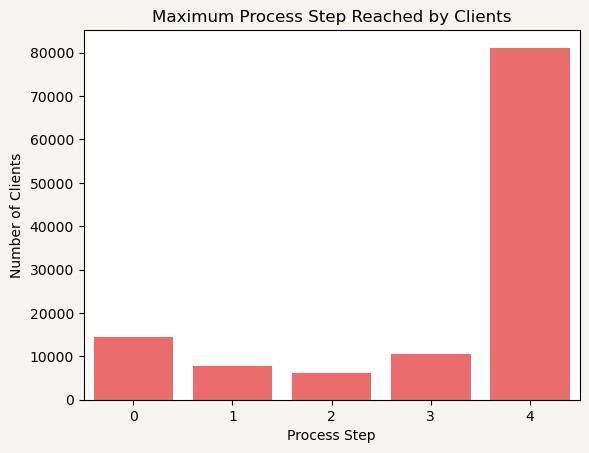

In [40]:
# Agrupar por 'client_id' y encontrar el paso máximo alcanzado por cada cliente
max_steps_per_client = df_total.groupby('client_id')['process_step_num'].max()

# Contar cuántos clientes llegaron a cada paso máximo
step_counts = max_steps_per_client.value_counts().sort_index()

# Crear un DataFrame para utilizar en el gráfico de barras
df_step_counts = pd.DataFrame({'Process Step': step_counts.index, 'Number of Clients': step_counts.values})

# Crear el gráfico de barras
fig, ax = plt.subplots(facecolor='#f7f5f2')

sns.barplot(
    data=df_step_counts,
    x='Process Step',
    y='Number of Clients',
    color='#ff5757',  # Color for the bars
    ax=ax
)

# Personalizar el gráfico
ax.set_title("Maximum Process Step Reached by Clients")
ax.set_xlabel("Process Step")
ax.set_ylabel("Number of Clients")

# Mostrar el gráfico
plt.show()

# HEAT MAP CODE

In [42]:
bins_age = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, float('inf')]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100+']
# Discretizar las edades en categorías
df['clnt_age_category'] = pd.cut(df['clnt_age'], bins=bins_age, labels=labels, right=False, include_lowest=True)

C:\Users\barba\AppData\Local\Temp\ipykernel_12208\1693145127.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clnt_age_category'] = pd.cut(df['clnt_age'], bins=bins_age, labels=labels, right=False, include_lowest=True)


In [43]:
age_category_counts = df['clnt_age_category'].value_counts().sort_index()
age_category_counts

clnt_age_category
0-9          0
10-19     2873
20-29    46943
30-39    55164
40-49    52057
50-59    72679
60-69    63139
70-79    19849
80-89     4112
90-99      307
100+         0
Name: count, dtype: int64

## Drop Out Rates for Both Test and Control Categories

In [45]:
crosstab_result = pd.crosstab(df['clnt_age_category'], df['process_step'])

crosstab_result

process_step,confirm,start,step_1,step_2,step_3
clnt_age_category,,,,,
10-19,438,818,616,537,464
20-29,6643,14222,10136,8624,7318
30-39,7868,17270,11756,9859,8411
40-49,7278,16382,11137,9371,7889
50-59,9567,23567,15516,13096,10933
60-69,8208,20580,13588,11065,9698
70-79,2382,6767,4453,3325,2922
80-89,511,1376,916,731,578
90-99,28,132,66,44,37


In [46]:
# Reorder columns
new_column_order = ['start', 'step_1', 'step_2', 'step_3','confirm']

crosstab_result = crosstab_result[new_column_order]

print(crosstab_result)

process_step       start  step_1  step_2  step_3  confirm
clnt_age_category                                        
10-19                818     616     537     464      438
20-29              14222   10136    8624    7318     6643
30-39              17270   11756    9859    8411     7868
40-49              16382   11137    9371    7889     7278
50-59              23567   15516   13096   10933     9567
60-69              20580   13588   11065    9698     8208
70-79               6767    4453    3325    2922     2382
80-89               1376     916     731     578      511
90-99                132      66      44      37       28


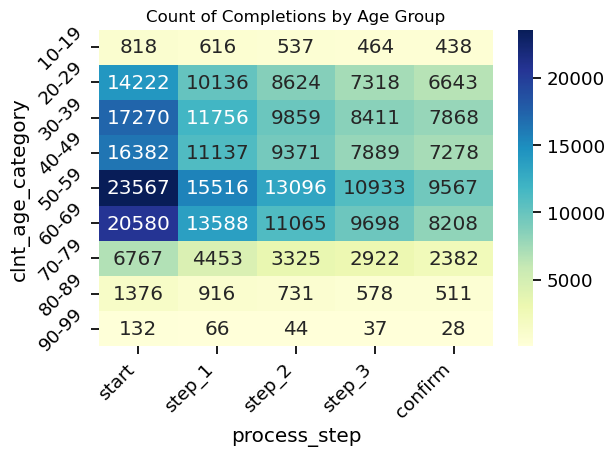

In [47]:
# Example usage of sns.heatmap with label rotation
sns.set_context('notebook', font_scale=1.2)  # Optional for setting font size
ax = sns.heatmap(crosstab_result, annot=True, cmap="YlGnBu", fmt="d")

# Rotate the x and y-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, ha='right')  # Rotate y-axis labels
ax.set_title('Count of Completions by Age Group', fontsize=12)

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [48]:
# Normalizing each row to get the percentage
crosstab_percentage = crosstab_result.div(crosstab_result.sum(axis=1), axis=0) * 100

print(crosstab_percentage)

process_step           start     step_1     step_2     step_3    confirm
clnt_age_category                                                       
10-19              28.471981  21.441002  18.691263  16.150365  15.245388
20-29              30.296317  21.592144  18.371216  15.589119  14.151205
30-39              31.306649  21.311000  17.872163  15.247263  14.262925
40-49              31.469351  21.393857  18.001422  15.154542  13.980829
50-59              32.426148  21.348670  18.018960  15.042860  13.163362
60-69              32.594751  21.520772  17.524826  15.359762  12.999889
70-79              34.092398  22.434380  16.751474  14.721145  12.000605
80-89              33.463035  22.276265  17.777237  14.056420  12.427043
90-99              42.996743  21.498371  14.332248  12.052117   9.120521


In [49]:
# Calculate percentages
crosstab_percentage = crosstab_result.copy()

for index in crosstab_result.index:
    start_val = crosstab_result.at[index, 'start']
    crosstab_percentage.loc[index, 'step_1':] = (crosstab_result.loc[index, 'step_1':] / start_val) * 100

# Drop the 'start' column after calculation
crosstab_percentage = crosstab_percentage.drop(columns='start')

print(crosstab_percentage)

process_step          step_1     step_2     step_3    confirm
clnt_age_category                                            
10-19              75.305623  65.647922  56.723716  53.545232
20-29              71.269864  60.638447  51.455491  46.709324
30-39              68.071801  57.087435  48.702953  45.558772
40-49              67.983152  57.203028  48.156513  44.426810
50-59              65.837824  55.569228  46.391140  40.594900
60-69              66.025267  53.765792  47.123421  39.883382
70-79              65.804640  49.135511  43.180139  35.200236
80-89              66.569767  53.125000  42.005814  37.136628
90-99              50.000000  33.333333  28.030303  21.212121


C:\Users\barba\AppData\Local\Temp\ipykernel_12208\3528433805.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '75.30562347188264' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  crosstab_percentage.loc[index, 'step_1':] = (crosstab_result.loc[index, 'step_1':] / start_val) * 100
C:\Users\barba\AppData\Local\Temp\ipykernel_12208\3528433805.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '65.6479217603912' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  crosstab_percentage.loc[index, 'step_1':] = (crosstab_result.loc[index, 'step_1':] / start_val) * 100
C:\Users\barba\AppData\Local\Temp\ipykernel_12208\3528433805.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. 

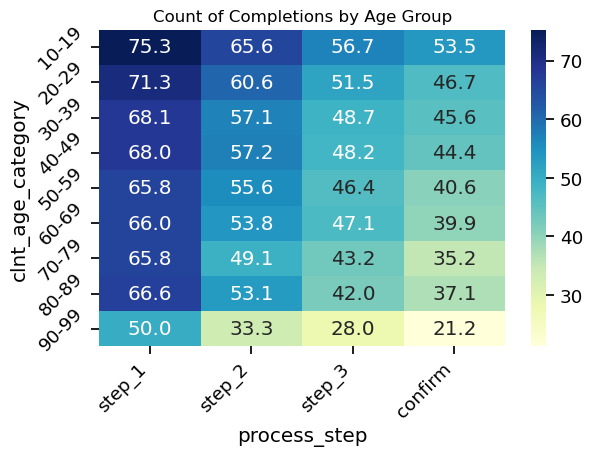

In [50]:
# Example usage of sns.heatmap with label rotation
sns.set_context('notebook', font_scale=1.2)  # Optional for setting font size
ax = sns.heatmap(crosstab_percentage, annot=True, cmap="YlGnBu", fmt=".1f")

# Rotate the x and y-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, ha='right')  # Rotate y-axis labels
ax.set_title('Count of Completions by Age Group', fontsize=12)

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

## Drop Out Rates by Test

In [52]:
# Filter the DataFrame for only 'Test' variations
df_filtered = df[df['Variation'] == 'Test']

# Create a crosstab with the filtered data
crosstab_result_test = pd.crosstab(df_filtered['clnt_age_category'], df_filtered['process_step'])

print(crosstab_result_test)

process_step       confirm  start  step_1  step_2  step_3
clnt_age_category                                        
10-19                  268    458     349     287     242
20-29                 4002   7762    5721    4513    3788
30-39                 4691   9489    6561    5208    4422
40-49                 4270   9023    6240    4977    4141
50-59                 5602  13228    8859    7177    5796
60-69                 4927  11450    7849    6267    5341
70-79                 1462   3599    2510    2007    1686
80-89                  352    682     530     425     316
90-99                   20     62      32      27      23


In [53]:
# Reorder columns
new_column_order = ['start', 'step_1', 'step_2', 'step_3','confirm']

crosstab_result_test = crosstab_result_test[new_column_order]

print(crosstab_result_test)

process_step       start  step_1  step_2  step_3  confirm
clnt_age_category                                        
10-19                458     349     287     242      268
20-29               7762    5721    4513    3788     4002
30-39               9489    6561    5208    4422     4691
40-49               9023    6240    4977    4141     4270
50-59              13228    8859    7177    5796     5602
60-69              11450    7849    6267    5341     4927
70-79               3599    2510    2007    1686     1462
80-89                682     530     425     316      352
90-99                 62      32      27      23       20


In [54]:
# Calculate percentages
crosstab_percentage_test = crosstab_result_test.copy()

for index in crosstab_result_test.index:
    start_val = crosstab_result_test.at[index, 'start']
    crosstab_percentage_test.loc[index, 'start':] = (crosstab_result_test.loc[index, 'start':] / start_val) * 100

# Drop the 'start' column after calculation
crosstab_percentage_test = crosstab_percentage_test.drop(columns='start')

print(crosstab_percentage_test)

process_step          step_1     step_2     step_3    confirm
clnt_age_category                                            
10-19              76.200873  62.663755  52.838428  58.515284
20-29              73.705231  58.142231  48.801855  51.558877
30-39              69.143218  54.884603  46.601328  49.436189
40-49              69.156600  55.159038  45.893827  47.323507
50-59              66.971575  54.256123  43.816148  42.349562
60-69              68.550218  54.733624  46.646288  43.030568
70-79              69.741595  55.765490  46.846346  40.622395
80-89              77.712610  62.316716  46.334311  51.612903
90-99              51.612903  43.548387  37.096774  32.258065


C:\Users\barba\AppData\Local\Temp\ipykernel_12208\55076801.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '76.2008733624454' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  crosstab_percentage_test.loc[index, 'start':] = (crosstab_result_test.loc[index, 'start':] / start_val) * 100
C:\Users\barba\AppData\Local\Temp\ipykernel_12208\55076801.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '62.66375545851528' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  crosstab_percentage_test.loc[index, 'start':] = (crosstab_result_test.loc[index, 'start':] / start_val) * 100
C:\Users\barba\AppData\Local\Temp\ipykernel_12208\55076801.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version o

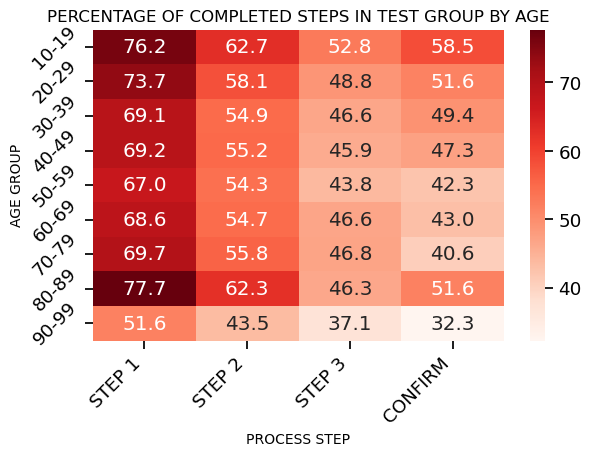

In [55]:
sns.set_context('notebook', font_scale=1.2)  # Optional for setting font size
ax = sns.heatmap(crosstab_percentage_test, annot=True, cmap="Reds", fmt=".1f")

# Rotate the x and y-axis labels
ax.set_xticklabels([label.get_text().replace('_', ' ').upper() for label in ax.get_xticklabels()], rotation=45, ha='right')
ax.set_yticklabels([label.get_text().replace('_', ' ').upper() for label in ax.get_yticklabels()], rotation=45, ha='right')

# Set the main title and the axis titles in uppercase
ax.set_title('PERCENTAGE OF COMPLETED STEPS IN TEST GROUP BY AGE', fontsize=15)
ax.set_xlabel('PROCESS STEP', fontsize=10)
ax.set_ylabel('AGE GROUP', fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, ha='right')  # Rotate y-axis labels
ax.set_title('PERCENTAGE OF COMPLETED STEPS IN TEST GROUP BY AGE', fontsize=12)

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

## Drop Out Rates by Control

In [57]:
# Filter the DataFrame for only 'Test' variations
df_filtered = df[df['Variation'] == 'Control']

# Create a crosstab with the filtered data
crosstab_result_cont = pd.crosstab(df_filtered['clnt_age_category'], df_filtered['process_step'])

print(crosstab_result_cont)

process_step       confirm  start  step_1  step_2  step_3
clnt_age_category                                        
10-19                  170    360     267     250     222
20-29                 2641   6460    4415    4111    3530
30-39                 3177   7781    5195    4651    3989
40-49                 3008   7359    4897    4394    3748
50-59                 3965  10339    6657    5919    5137
60-69                 3281   9130    5739    4798    4357
70-79                  920   3168    1943    1318    1236
80-89                  159    694     386     306     262
90-99                    8     70      34      17      14


In [58]:
# Reorder columns
new_column_order = ['start', 'step_1', 'step_2', 'step_3','confirm']

crosstab_result_cont = crosstab_result_cont[new_column_order]

print(crosstab_result_cont)

process_step       start  step_1  step_2  step_3  confirm
clnt_age_category                                        
10-19                360     267     250     222      170
20-29               6460    4415    4111    3530     2641
30-39               7781    5195    4651    3989     3177
40-49               7359    4897    4394    3748     3008
50-59              10339    6657    5919    5137     3965
60-69               9130    5739    4798    4357     3281
70-79               3168    1943    1318    1236      920
80-89                694     386     306     262      159
90-99                 70      34      17      14        8


In [59]:
crosstab_percentage_cont = crosstab_result_cont.copy()

for index in crosstab_result_cont.index:
    start_val = crosstab_result_cont.at[index, 'start']
    crosstab_percentage_cont.loc[index, 'start':] = (crosstab_result_cont.loc[index, 'start':] / start_val) * 100

# Drop the 'start' column after calculation
crosstab_percentage_cont = crosstab_percentage_cont.drop(columns='start')

print(crosstab_percentage_cont)

process_step          step_1     step_2     step_3    confirm
clnt_age_category                                            
10-19              74.166667  69.444444  61.666667  47.222222
20-29              68.343653  63.637771  54.643963  40.882353
30-39              66.765197  59.773808  51.265904  40.830227
40-49              66.544367  59.709200  50.930833  40.875119
50-59              64.387271  57.249250  49.685656  38.349937
60-69              62.858708  52.552026  47.721796  35.936473
70-79              61.332071  41.603535  39.015152  29.040404
80-89              55.619597  44.092219  37.752161  22.910663
90-99              48.571429  24.285714  20.000000  11.428571


C:\Users\barba\AppData\Local\Temp\ipykernel_12208\1682030894.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '74.16666666666667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  crosstab_percentage_cont.loc[index, 'start':] = (crosstab_result_cont.loc[index, 'start':] / start_val) * 100
C:\Users\barba\AppData\Local\Temp\ipykernel_12208\1682030894.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '69.44444444444444' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  crosstab_percentage_cont.loc[index, 'start':] = (crosstab_result_cont.loc[index, 'start':] / start_val) * 100
C:\Users\barba\AppData\Local\Temp\ipykernel_12208\1682030894.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future ve

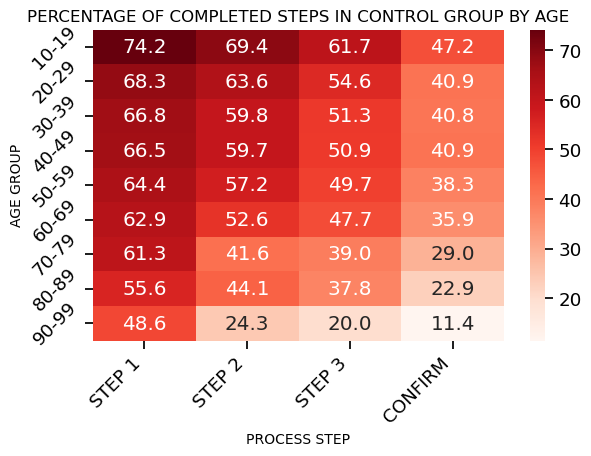

In [60]:
sns.set_context('notebook', font_scale=1.2)  # Optional for setting font size
ax = sns.heatmap(crosstab_percentage_cont, annot=True, cmap="Reds", fmt=".1f")

ax.set_xticklabels([label.get_text().replace('_', ' ').upper() for label in ax.get_xticklabels()], rotation=45, ha='right')
ax.set_yticklabels([label.get_text().replace('_', ' ').upper() for label in ax.get_yticklabels()], rotation=45, ha='right')

# Set the main title and the axis titles in uppercase
ax.set_title('PERCENTAGE OF COMPLETED STEPS IN CONTROL GROUP BY AGE', fontsize=15)
ax.set_xlabel('PROCESS STEP', fontsize=10)
ax.set_ylabel('AGE GROUP', fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, ha='right')  # Rotate y-axis labels
ax.set_title('PERCENTAGE OF COMPLETED STEPS IN CONTROL GROUP BY AGE', fontsize=12)

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

# KPI

## Completion Rate

### Completion Rate by Visit ID

In [64]:
# Filter unique sessions that reached the final step (4)
completed_sessions = df[df["process_step_num"] == 4]["visit_id"].unique()

# Total number of sessions per group
total_sessions = df.groupby("Variation")["visit_id"].nunique()

# Sessions that completed the process per group
completed_per_group = df[df["visit_id"].isin(completed_sessions)].groupby("Variation")["visit_id"].nunique()

# Calculate the Completion Rate
completion_rate = (completed_per_group / total_sessions) * 100

# Display results
print("Completion Rate per group:")
print(completion_rate)

Completion Rate per group:
Variation
Control    49.883501
Test       58.530806
Name: visit_id, dtype: float64


### Completion Rate by Client ID

In [66]:
# Filter unique clients that reached the final step (4)
completed_clients = df[df["process_step_num"] == 4]["client_id"].unique()

# Total number of clients per group
total_clients = df.groupby("Variation")["client_id"].nunique()

# Clients that completed the process per group
completed_clients_per_group = df[df["client_id"].isin(completed_clients)].groupby("Variation")["client_id"].nunique()

# Calculate the Completion Rate using client_id
completion_rate_clients = (completed_clients_per_group / total_clients) * 100

# Display results
print("Completion Rate per group using client_id (client-based):")
print(completion_rate_clients)

Completion Rate per group using client_id (client-based):
Variation
Control    65.587285
Test       69.293236
Name: client_id, dtype: float64


### Check Multiple Completions

In [68]:
# Filter for rows where the process step is 4
completed_process_df = df[df["process_step_num"] == 4]

# Identify visit_ids that appear more than once with step 4
visits_multiple_step4 = completed_process_df.groupby("visit_id").filter(lambda x: len(x) > 1)["visit_id"]

# Exclude visit_ids that appear more than once in step 4
unique_step4_visits_df = completed_process_df[~completed_process_df["visit_id"].isin(visits_multiple_step4)]

# Count unique clients from the cleaned data
unique_clients_reaching_step4 = unique_step4_visits_df["client_id"].nunique()

# Display result
print("Number of clients who reached step 4 with each visit_id having only one step 4:")
print(unique_clients_reaching_step4)

Number of clients who reached step 4 with each visit_id having only one step 4:
31472


In [69]:
# Filter for rows where the process step is 4
completed_process_df = df[df["process_step_num"] == 4]

# Identify visit_ids that appear more than once with step 4
visits_multiple_step4 = completed_process_df.groupby("visit_id").filter(lambda x: len(x) > 1)["visit_id"]

# Exclude visit_ids that appear more than once in step 4
unique_step4_visits_df = completed_process_df[~completed_process_df["visit_id"].isin(visits_multiple_step4)]

# Count how many times each client reaches step 4
client_completion_counts = unique_step4_visits_df.groupby("client_id").size()

# Group these counts to see the distribution
completion_count_distribution = client_completion_counts.value_counts().sort_index()

# Display the distribution of clients by the number of times they reached step 4
print("Distribution of clients by the number of times they reached step 4 (considering only one step 4 per visit_id):")
print(completion_count_distribution)

Distribution of clients by the number of times they reached step 4 (considering only one step 4 per visit_id):
1     29548
2      1544
3       271
4        67
5        22
6        12
7         3
9         3
10        2
Name: count, dtype: int64


## Time spend on each step

In [71]:
# Ensure 'date_time' is in datetime format
df['date_time'] = pd.to_datetime(df['date_time'])

# Sort the DataFrame by visit_id and date_time to ensure chronological order
df = df.sort_values(by=['visit_id', 'date_time'])

# Create 'start_time' and 'end_time' columns
df['start_time'] = df['date_time']
df['end_time'] = df.groupby('visit_id')['date_time'].shift(-1)
df.loc[df['process_step_num'] == 4, 'end_time'] = df['date_time']
df['end_time'].fillna(df['date_time'], inplace=True)

# Calculate 'time_spent' as the difference between 'end_time' and 'start_time'
df['time_spent'] = (df['end_time'] - df['start_time']).dt.total_seconds()

# Define the 'time_spent_clean' column
def apply_time_spent_clean(group):
    confirm_found = False
    group['time_spent_clean'] = group['time_spent']
    
    for i in range(len(group)):
        if group.iloc[i]['process_step_num'] == 4:
            confirm_found = True
        
        if confirm_found:
            group.at[group.index[i], 'time_spent_clean'] = float('nan')
    
    return group

# Apply the function to calculate 'time_spent_clean' for each visit_id
df = df.groupby('visit_id', group_keys=False).apply(apply_time_spent_clean)

# Create a new DataFrame with the desired columns, including process_step_num
df_time_per_visit = df[['client_id', 'visitor_id', 'visit_id', 'Variation', 'process_step', 'process_step_num', 'date_time', 'start_time', 'end_time', 'time_spent', 'time_spent_clean']]

C:\Users\barba\AppData\Local\Temp\ipykernel_12208\3534111067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_time'] = pd.to_datetime(df['date_time'])
C:\Users\barba\AppData\Local\Temp\ipykernel_12208\3534111067.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['end_tim

In [72]:
df_time_per_visit.head(50)

,client_id,visitor_id,visit_id,Variation,process_step,process_step_num,date_time,start_time,end_time,time_spent,time_spent_clean
107971,3561384,451664975_1722933822,100012776_37918976071_457913,Test,confirm,4,2017-04-26 13:22:17,2017-04-26 13:22:17,2017-04-26 13:22:17,0.0,NaN
107970,3561384,451664975_1722933822,100012776_37918976071_457913,Test,confirm,4,2017-04-26 13:23:09,2017-04-26 13:23:09,2017-04-26 13:23:09,0.0,NaN
239141,7338123,612065484_94198474375,100019538_17884295066_43909,Test,start,0,2017-04-09 16:20:56,2017-04-09 16:20:56,2017-04-09 16:21:12,16.0,16.0
239140,7338123,612065484_94198474375,100019538_17884295066_43909,Test,step_1,1,2017-04-09 16:21:12,2017-04-09 16:21:12,2017-04-09 16:21:21,9.0,9.0
239139,7338123,612065484_94198474375,100019538_17884295066_43909,Test,step_2,2,2017-04-09 16:21:21,2017-04-09 16:21:21,2017-04-09 16:21:35,14.0,14.0
239138,7338123,612065484_94198474375,100019538_17884295066_43909,Test,step_1,1,2017-04-09 16:21:35,2017-04-09 16:21:35,2017-04-09 16:21:41,6.0,6.0
239137,7338123,612065484_94198474375,100019538_17884295066_43909,Test,step_1,1,2017-04-09 16:21:41,2017-04-09 16:21:41,2017-04-09 16:21:45,4.0,4.0
239136,7338123,612065484_94198474375,100019538_17884295066_43909,Test,start,0,2017-04-09 16:21:45,2017-04-09 16:21:45,2017-04-09 16:21:59,14.0,14.0
239135,7338123,612065484_94198474375,100019538_17884295066_43909,Test,start,0,2017-04-09 16:21:59,2017-04-09 16:21:59,2017-04-09 16:22:04,5.0,5.0
239134,7338123,612065484_94198474375,100019538_17884295066_43909,Test,step_1,1,2017-04-09 16:22:04,2017-04-09 16:22:04,2017-04-09 16:22:08,4.0,4.0


## Error Rates

In [74]:
# Define a function to check for errors within each visit_id
def check_error_within_visit(group):
    # Initialize the 'Error' column with 0
    group['Error'] = 0
    
    # Iterate over the group and compare each row with the previous one
    for i in range(1, len(group)):
        # Check if the current process_step_num is less than or equal to the previous one
        if group.iloc[i]['process_step_num'] <= group.iloc[i-1]['process_step_num']:
            group.at[group.index[i], 'Error'] = 1

    return group

# Apply the function to each visit_id
df_time_per_visit = df_time_per_visit.groupby('visit_id', group_keys=False).apply(check_error_within_visit)

C:\Users\barba\AppData\Local\Temp\ipykernel_12208\1576251632.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_time_per_visit = df_time_per_visit.groupby('visit_id', group_keys=False).apply(check_error_within_visit)


In [75]:
df_time_per_visit.head(10)

,client_id,visitor_id,visit_id,Variation,process_step,process_step_num,date_time,start_time,end_time,time_spent,time_spent_clean,Error
107971,3561384,451664975_1722933822,100012776_37918976071_457913,Test,confirm,4,2017-04-26 13:22:17,2017-04-26 13:22:17,2017-04-26 13:22:17,0.0,NaN,0
107970,3561384,451664975_1722933822,100012776_37918976071_457913,Test,confirm,4,2017-04-26 13:23:09,2017-04-26 13:23:09,2017-04-26 13:23:09,0.0,NaN,1
239141,7338123,612065484_94198474375,100019538_17884295066_43909,Test,start,0,2017-04-09 16:20:56,2017-04-09 16:20:56,2017-04-09 16:21:12,16.0,16.0,0
239140,7338123,612065484_94198474375,100019538_17884295066_43909,Test,step_1,1,2017-04-09 16:21:12,2017-04-09 16:21:12,2017-04-09 16:21:21,9.0,9.0,0
239139,7338123,612065484_94198474375,100019538_17884295066_43909,Test,step_2,2,2017-04-09 16:21:21,2017-04-09 16:21:21,2017-04-09 16:21:35,14.0,14.0,0
239138,7338123,612065484_94198474375,100019538_17884295066_43909,Test,step_1,1,2017-04-09 16:21:35,2017-04-09 16:21:35,2017-04-09 16:21:41,6.0,6.0,1
239137,7338123,612065484_94198474375,100019538_17884295066_43909,Test,step_1,1,2017-04-09 16:21:41,2017-04-09 16:21:41,2017-04-09 16:21:45,4.0,4.0,1
239136,7338123,612065484_94198474375,100019538_17884295066_43909,Test,start,0,2017-04-09 16:21:45,2017-04-09 16:21:45,2017-04-09 16:21:59,14.0,14.0,1
239135,7338123,612065484_94198474375,100019538_17884295066_43909,Test,start,0,2017-04-09 16:21:59,2017-04-09 16:21:59,2017-04-09 16:22:04,5.0,5.0,1
239134,7338123,612065484_94198474375,100019538_17884295066_43909,Test,step_1,1,2017-04-09 16:22:04,2017-04-09 16:22:04,2017-04-09 16:22:08,4.0,4.0,0


In [76]:
# df_time_per_visit.to_csv('df_time_spent_error.txt', sep='\t', index=False)

## Time spend on each step and Error analysis

In [78]:
# Initialize the 'completed' column with 0
df_time_per_visit['completed'] = 0

# Find clients who have completed step 4
completed_clients = df_time_per_visit[df_time_per_visit['process_step_num'] == 4]['client_id'].unique()

# Assign 1 to all records of those clients
df_time_per_visit.loc[df_time_per_visit['client_id'].isin(completed_clients), 'completed'] = 1

df_time_per_visit.head()

,client_id,visitor_id,visit_id,Variation,process_step,process_step_num,date_time,start_time,end_time,time_spent,time_spent_clean,Error,completed
107971,3561384,451664975_1722933822,100012776_37918976071_457913,Test,confirm,4,2017-04-26 13:22:17,2017-04-26 13:22:17,2017-04-26 13:22:17,0.0,NaN,0,1
107970,3561384,451664975_1722933822,100012776_37918976071_457913,Test,confirm,4,2017-04-26 13:23:09,2017-04-26 13:23:09,2017-04-26 13:23:09,0.0,NaN,1,1
239141,7338123,612065484_94198474375,100019538_17884295066_43909,Test,start,0,2017-04-09 16:20:56,2017-04-09 16:20:56,2017-04-09 16:21:12,16.0,16.0,0,1
239140,7338123,612065484_94198474375,100019538_17884295066_43909,Test,step_1,1,2017-04-09 16:21:12,2017-04-09 16:21:12,2017-04-09 16:21:21,9.0,9.0,0,1
239139,7338123,612065484_94198474375,100019538_17884295066_43909,Test,step_2,2,2017-04-09 16:21:21,2017-04-09 16:21:21,2017-04-09 16:21:35,14.0,14.0,0,1


### Time spend analysis

In [80]:
average_time_per_step_clean = df_time_per_visit.groupby(['Variation', 'process_step_num'])['time_spent_clean'].mean().reset_index()

print(average_time_per_step_clean)

  Variation  process_step_num  time_spent_clean
0   Control                 0         53.123677
1   Control                 1         44.583342
2   Control                 2         86.915851
3   Control                 3        124.520244
4   Control                 4               NaN
5      Test                 0         51.287523
6      Test                 1         55.839174
7      Test                 2         85.162425
8      Test                 3        121.176781
9      Test                 4               NaN


In [81]:
average_time_per_step = df_time_per_visit.groupby(['Variation', 'process_step_num'])['time_spent'].mean().reset_index()

print(average_time_per_step)

  Variation  process_step_num  time_spent
0   Control                 0   52.613530
1   Control                 1   44.562449
2   Control                 2   86.839832
3   Control                 3  123.674621
4   Control                 4    0.000000
5      Test                 0   51.046331
6      Test                 1   55.827730
7      Test                 2   85.070714
8      Test                 3  120.667132
9      Test                 4    0.000000


In [82]:
# Filter only clients who completed step 4 at least once
completed_clients = df_time_per_visit[df_time_per_visit['process_step_num'] == 4]['client_id'].unique()

# Filter the DataFrame to include only clients who completed the process
filtered_df = df_time_per_visit[df_time_per_visit['client_id'].isin(completed_clients)]

# Sum the time of each visit (visit_id) per client, disaggregated by 'Variation'
visit_time_sums = filtered_df.groupby(['Variation', 'client_id', 'visit_id'])['time_spent_clean'].sum()

# Calculate the average total time across visit_id for each client and disaggregate by 'Variation'
average_completion_time = visit_time_sums.groupby(['Variation', 'client_id']).mean()

# Finally, calculate the overall average time to complete the process, disaggregated by 'Variation'
overall_average_time_by_variation = average_completion_time.groupby('Variation').mean()

print("Average time to complete the process by Variation:")
print(overall_average_time_by_variation)

Average time to complete the process by Variation:
Variation
Control    340.827258
Test       326.496602
Name: time_spent_clean, dtype: float64


In [83]:
# Find the maximum step reached by each client within each group of Variation and client_id
max_step_per_client = df_time_per_visit.groupby(['Variation', 'client_id'])['process_step_num'].max().reset_index()

# Calculate the average of the maximum step reached, grouped by Variation
average_max_step_by_variation = max_step_per_client.groupby('Variation')['process_step_num'].mean()

print("Average of the maximum step reached per Variation:")
print(average_max_step_by_variation)

Average of the maximum step reached per Variation:
Variation
Control    3.059663
Test       3.220780
Name: process_step_num, dtype: float64


### Error analysis

In [85]:
error_mean_by_step = df_time_per_visit.groupby(['Variation', 'process_step_num'])['Error'].mean().reset_index()

print(error_mean_by_step)

  Variation  process_step_num     Error
0   Control                 0  0.321639
1   Control                 1  0.118095
2   Control                 2  0.124277
3   Control                 3  0.037817
4   Control                 4  0.071470
5      Test                 0  0.409284
6      Test                 1  0.128976
7      Test                 2  0.092689
8      Test                 3  0.034859
9      Test                 4  0.148047


In [86]:
# Calcular la suma de errores y el conteo de cada paso
grouped = df_time_per_visit.groupby(['Variation', 'process_step_num']).agg({'Error': 'sum', 'process_step_num': 'count'}).rename(columns={'process_step_num': 'count'})

# Calcular el error medio ajustado
grouped['Adjusted Error Mean'] = grouped['Error'] / grouped['count']

# Restablecer el índice para visualizarlo claramente
adjusted_error_mean_by_step = grouped.reset_index()

print(adjusted_error_mean_by_step)

  Variation  process_step_num  Error  count  Adjusted Error Mean
0   Control                 0  14596  45380             0.321639
1   Control                 1   3489  29544             0.118095
2   Control                 2   3203  25773             0.124277
3   Control                 3    851  22503             0.037817
4   Control                 4   1239  17336             0.071470
5      Test                 0  22827  55773             0.409284
6      Test                 1   4987  38666             0.128976
7      Test                 2   2864  30899             0.092689
8      Test                 3    898  25761             0.034859
9      Test                 4   3790  25600             0.148047


In [87]:
average_error_rate_by_variation = grouped.groupby('Variation')['Adjusted Error Mean'].mean().reset_index()

print(average_error_rate_by_variation)

  Variation  Adjusted Error Mean
0   Control             0.134660
1      Test             0.162771


# Hypothesis Testing

## Completion Rate

H0: There is no difference in Completion Rate between Test and Control.


H1: The Completion Rate of the Test is significantly different from that of the Control.

In [91]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

# Filter unique sessions that reached the final step (4)
completed_sessions = df[df["process_step_num"] == 4]["visit_id"].unique()

# Total number of sessions per group
total_sessions = df.groupby("Variation")["visit_id"].nunique()

# Sessions that completed the process per group
completed_per_group = df[df["visit_id"].isin(completed_sessions)].groupby("Variation")["visit_id"].nunique()

# Define count and nobs with actual data
count = np.array([completed_per_group["Test"], completed_per_group["Control"]])
nobs = np.array([total_sessions["Test"], total_sessions["Control"]])

# Hypothesis testing (Z-test)
stat, p_value = proportions_ztest(count, nobs, alternative="two-sided")

# Display results
print(f"Z-score: {stat:}")
print(f"P-value: {p_value:}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the Completion Rate.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence of a difference.")

Z-score: 22.803188818174483
P-value: 4.262985963254832e-115
Reject the null hypothesis: There is a significant difference in the Completion Rate.


Z-score:

The Z-score quantifies the number of standard deviations the observed difference in Completion Rates is from the null hypothesis.
A high absolute Z-score suggests the difference is not due to random sampling variability.


P-value:

The p-value is the probability of observing data at least as extreme as the data we have, assuming the null hypothesis is true.
A very low p-value (< 0.05) indicates strong evidence against the null hypothesis, leading us to conclude that there is a significant difference between groups.


Conclusion:

Given the results, since the p-value is significantly lower than the alpha level of 0.05, we reject the null hypothesis.
"his suggests a statistically significant difference in completion rates between the 'Test' and 'Control' groups.

In [93]:
# Definir el umbral de mejora en puntos porcentuales
threshold = 5.0  # 5 puntos porcentuales

# Calcular la diferencia absoluta en Completion Rate
completion_rate_diff = completion_rate["Test"] - completion_rate["Control"]  # Ya está en porcentaje

# Verificar si la diferencia es al menos 5 puntos porcentuales
if completion_rate_diff >= threshold:
    print(f"La mejora en la Completion Rate es {completion_rate_diff:.2f} puntos porcentuales, lo que supera el umbral del 5%.")
    print("Desde una perspectiva de costo-beneficio, la nueva UI es justificable.")
else:
    print(f"La mejora en la Completion Rate es {completion_rate_diff:.2f} puntos porcentuales, lo que NO alcanza el umbral del 5%.")
    print("La nueva UI podría no ser justificable en términos de costo-beneficio.")

La mejora en la Completion Rate es 8.65 puntos porcentuales, lo que supera el umbral del 5%.
Desde una perspectiva de costo-beneficio, la nueva UI es justificable.


# Experiment Evaluation

## By gender

H0: There is no association between the gender and the variation group.
H1: There is an association between the gender and the variation group.

In [97]:
from scipy.stats import chi2_contingency

# Filter for unique clients
unique_clients = df.drop_duplicates(subset=['client_id'])

# Ensure we're only using the relevant columns
unique_clients = unique_clients[['client_id', 'gendr', 'Variation']]

# Create the contingency table
contingency_table = pd.crosstab(unique_clients['Variation'], unique_clients['gendr'])

# Perform the Chi-Square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-Square Test for gendr: p-value = {p_value:.5f}")
if p_value < 0.05:
    print("The distribution of gendr is significantly different between Test and Control groups!")
else:
    print("No significant difference in gendr distribution between groups.")

Chi-Square Test for gendr: p-value = 0.30510
No significant difference in gendr distribution between groups.


# By Tenure Year, Age and Balance (mannwhitneyu) - Because they have two peaks

H0: The distribution of the numeric variable is the same across the Test and Control groups.
H1: The distribution of the numeric variable is different between the Test and Control groups.

In [100]:
from scipy.stats import mannwhitneyu

# Ensure unique clients
unique_clients = df.drop_duplicates(subset=['client_id'])

# Select numeric columns to check
numeric_columns = ['clnt_tenure_yr', 'clnt_age', 'bal']

# Iterate over each numeric column
for col in numeric_columns:
    # Check for missing values in the column
    missing_values_count = unique_clients[col].isnull().sum()
    print(f"Missing values in {col}: {missing_values_count}")
    
    # Remove rows with missing values for this column
    data_clean = unique_clients.dropna(subset=[col])
    
    # Split the data into Test and Control groups
    test_group = data_clean[data_clean['Variation'] == 'Test'][col]
    control_group = data_clean[data_clean['Variation'] == 'Control'][col]
    
    # Check groups are not empty
    if len(test_group) == 0 or len(control_group) == 0:
        print(f"One of the groups for {col} is empty after cleaning; skipping this column.")
        continue
    
    # Perform Mann-Whitney U test
    stat, p_value = mannwhitneyu(test_group, control_group, alternative='two-sided')
    
    # Output the results
    print(f"Test for {col}: p-value = {p_value:.5f}")
    if p_value < 0.05:
        print(f"There is a significant difference in {col} between Test and Control groups.")
    else:
        print(f"No significant difference in {col} between groups.")
    print("-" * 50)

Missing values in clnt_tenure_yr: 12
Test for clnt_tenure_yr: p-value = 0.08689
No significant difference in clnt_tenure_yr between groups.
--------------------------------------------------
Missing values in clnt_age: 13
Test for clnt_age: p-value = 0.01465
There is a significant difference in clnt_age between Test and Control groups.
--------------------------------------------------
Missing values in bal: 12
Test for bal: p-value = 0.14857
No significant difference in bal between groups.
--------------------------------------------------


# By Tenure Year, Age and Balance (ttest_ind)

H0: The distribution of the numeric variable is the same across the Test and Control groups.
H1: The distribution of the numeric variable is different between the Test and Control groups.

In [103]:
from scipy.stats import ttest_ind

# Ensure unique clients
unique_clients = df.drop_duplicates(subset=['client_id'])

# Select numeric columns to check
numeric_columns = ['clnt_tenure_yr', 'clnt_age', 'bal']

# Iterate over each numeric column
for col in numeric_columns:
    # Check for missing values in the column
    missing_values_count = unique_clients[col].isnull().sum()
    print(f"Missing values in {col}: {missing_values_count}")
    
    # Remove rows with missing values for this column
    data_clean = unique_clients.dropna(subset=[col])
    
    # Split the data into Test and Control groups
    test_group = data_clean[data_clean['Variation'] == 'Test'][col]
    control_group = data_clean[data_clean['Variation'] == 'Control'][col]
    
    # Check groups are not empty
    if len(test_group) == 0 or len(control_group) == 0:
        print(f"One of the groups for {col} is empty after cleaning; skipping this column.")
        continue
    
    # Perform independent sample t-test
    stat, p_value = ttest_ind(test_group, control_group, equal_var=False)  # use equal_var=False for unequal variances
    
    # Output the results
    print(f"T-test for {col}: p-value = {p_value:.5f}")
    if p_value < 0.05:
        print(f"There is a significant difference in {col} between Test and Control groups.")
    else:
        print(f"No significant difference in {col} between groups.")
    print("-" * 50)

Missing values in clnt_tenure_yr: 12
T-test for clnt_tenure_yr: p-value = 0.08699
No significant difference in clnt_tenure_yr between groups.
--------------------------------------------------
Missing values in clnt_age: 13
T-test for clnt_age: p-value = 0.01569
There is a significant difference in clnt_age between Test and Control groups.
--------------------------------------------------
Missing values in bal: 12
T-test for bal: p-value = 0.65936
No significant difference in bal between groups.
--------------------------------------------------


C:\Users\barba\AppData\Local\Temp\ipykernel_12208\392719941.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_clients['age_group'] = pd.cut(unique_clients['clnt_age'], bins=age_bins, labels=age_labels, right=False)
C:\Users\barba\AppData\Local\Temp\ipykernel_12208\392719941.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = unique_clients.groupby(['Variation', 'age_group']).size().unstack().fillna(0)


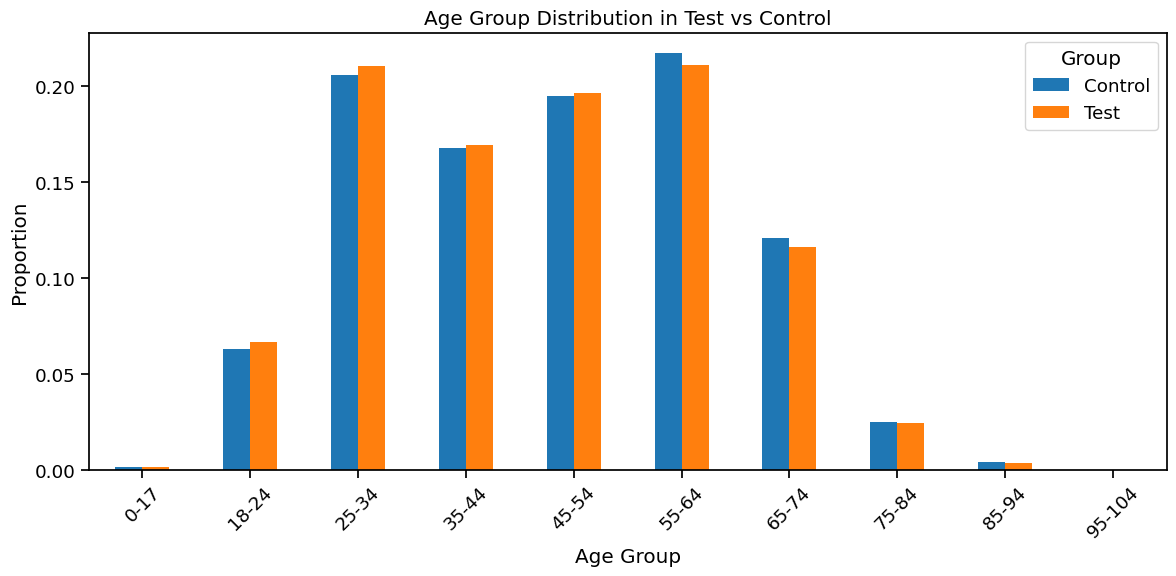

In [104]:
# Define age bins
age_bins = [0, 18, 25, 35, 45, 55, 65, 75, 85, 95, 105]
age_labels = ['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85-94', '95-104']

# Ensure unique clients
unique_clients = df.drop_duplicates(subset=['client_id'])

# Add 'age_group' column based on 'clnt_age' using the defined bins
unique_clients['age_group'] = pd.cut(unique_clients['clnt_age'], bins=age_bins, labels=age_labels, right=False)

# Calculate the proportion of each age group within Test and Control
age_group_counts = unique_clients.groupby(['Variation', 'age_group']).size().unstack().fillna(0)
age_group_proportions = age_group_counts.div(age_group_counts.sum(axis=1), axis=0)

# Plot the distribution of age groups
age_group_proportions.transpose().plot(kind='bar', figsize=(12, 6))
plt.title('Age Group Distribution in Test vs Control')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Group')
plt.tight_layout()
plt.show()

In [105]:
# Ensure unique clients
unique_clients = df.drop_duplicates(subset=['client_id'])

# Select numeric columns to check
numeric_columns = ['clnt_tenure_yr', 'clnt_age', 'bal']

# Remove rows with missing values in the relevant numeric columns before iterating
data_clean = unique_clients.dropna(subset=numeric_columns)

# Iterate over each numeric column
for col in numeric_columns:
    # Extract the Test and Control groups
    test_group = data_clean[data_clean['Variation'] == 'Test'][col]
    control_group = data_clean[data_clean['Variation'] == 'Control'][col]
    
    # Check that the groups are not empty
    if len(test_group) == 0 or len(control_group) == 0:
        print(f"One of the groups for {col} is empty after cleaning; skipping this column.")
        continue
    
    # Perform independent sample t-test
    stat, p_value = ttest_ind(test_group, control_group, equal_var=False)  # use equal_var=False for unequal variances
    
    # Output the results
    print(f"T-test for {col}: p-value = {p_value:.5f}")
    if p_value < 0.05:
        print(f"There is a significant difference in {col} between Test and Control groups.")
    else:
        print(f"No significant difference in {col} between groups.")
    print("-" * 50)

T-test for clnt_tenure_yr: p-value = 0.08647
No significant difference in clnt_tenure_yr between groups.
--------------------------------------------------
T-test for clnt_age: p-value = 0.01569
There is a significant difference in clnt_age between Test and Control groups.
--------------------------------------------------
T-test for bal: p-value = 0.65813
No significant difference in bal between groups.
--------------------------------------------------


In [106]:
# Ensure unique clients
unique_clients = df.drop_duplicates(subset=['client_id'])

# Define age bins (10 years each)
age_bins = range(0, 110, 10)
age_labels = [f'{i}-{i+9}' for i in age_bins[:-1]]

# Add 'age_group' column based on 'clnt_age' using defined bins
unique_clients['age_group'] = pd.cut(unique_clients['clnt_age'], bins=age_bins, labels=age_labels, right=False)

# Calculate the count of each age group within Test and Control
age_group_counts = unique_clients.groupby(['Variation', 'age_group']).size().reset_index(name='count')

# Calculate the total clients within each Variation group
total_per_variation = age_group_counts.groupby('Variation')['count'].transform('sum')

# Calculate proportions
age_group_counts['proportion'] = age_group_counts['count'] / total_per_variation

# Prepare the DataFrame for Tableau with a connector key
df_for_tableau = age_group_counts[['Variation', 'age_group', 'proportion']]

# Add a connector column, could be a simple index or a constant value if needed for linking
df_for_tableau['connector_key'] = 1  # Example if you need a static key to join

print(df_for_tableau)

# This DataFrame can be exported to a CSV for import into Tableau
# df_for_tableau.to_csv('age_group_distribution_for_tableau.csv', index=False)

   Variation age_group  proportion  connector_key
0    Control       0-9    0.000000              1
1    Control     10-19    0.008969              1
2    Control     20-29    0.158293              1
3    Control     30-39    0.187707              1
4    Control     40-49    0.171130              1
5    Control     50-59    0.221372              1
6    Control     60-69    0.182989              1
7    Control     70-79    0.058063              1
8    Control     80-89    0.010712              1
9    Control     90-99    0.000765              1
10      Test       0-9    0.000000              1
11      Test     10-19    0.009681              1
12      Test     20-29    0.160788              1
13      Test     30-39    0.194985              1
14      Test     40-49    0.172138              1
15      Test     50-59    0.216980              1
16      Test     60-69    0.178851              1
17      Test     70-79    0.055265              1
18      Test     80-89    0.010385              1


C:\Users\barba\AppData\Local\Temp\ipykernel_12208\712289863.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_clients['age_group'] = pd.cut(unique_clients['clnt_age'], bins=age_bins, labels=age_labels, right=False)
C:\Users\barba\AppData\Local\Temp\ipykernel_12208\712289863.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = unique_clients.groupby(['Variation', 'age_group']).size().reset_index(name='count')


In [107]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming your DataFrame is named df
# Ensure unique clients
unique_clients = df.drop_duplicates(subset=['client_id'])

# Select numeric columns to check
numeric_columns = ['clnt_tenure_yr', 'clnt_age', 'bal']

# Define the dependent variable for ANCOVA (based on available columns)
dependent_variable = 'bal'  # Replace with your actual dependent variable if different

# Perform ANCOVA for a dependent variable with clnt_age as a covariate
ancova_results = []

for col in numeric_columns:
    # Check for missing values in the column
    missing_values_count = unique_clients[col].isnull().sum()
    print(f"Missing values in {col}: {missing_values_count}")

    # Remove rows with missing values for this column and dependent variable
    data_clean = unique_clients.dropna(subset=[col, dependent_variable])

    # Prepare the formula for ANCOVA
    formula = f'{dependent_variable} ~ Variation + clnt_age + {col}'

    # Fit the model and perform ANCOVA
    model = ols(formula, data=data_clean).fit()
    ancova_table = sm.stats.anova_lm(model, typ=2)
    ancova_results.append((col, ancova_table))

    # Output the ANCOVA results
    print(f"ANCOVA results for {col}:")
    print(ancova_table)

    # Split the data into Test and Control groups
    test_group = data_clean[data_clean['Variation'] == 'Test'][col]
    control_group = data_clean[data_clean['Variation'] == 'Control'][col]

    # Check groups are not empty
    if len(test_group) == 0 or len(control_group) == 0:
        print(f"One of the groups for {col} is empty after cleaning; skipping this column.")
        continue
    
    # Perform independent sample t-test
    stat, p_value = ttest_ind(test_group, control_group, equal_var=False)  # use equal_var=False for unequal variances
    
    # Output the T-test results
    print(f"T-test for {col}: p-value = {p_value:.5f}")
    if p_value < 0.05:
        print(f"There is a significant difference in {col} between Test and Control groups.")
    else:
        print(f"No significant difference in {col} between groups.")
    print("-" * 50)

Missing values in clnt_tenure_yr: 12
ANCOVA results for clnt_tenure_yr:
                      sum_sq       df            F         PR(>F)
Variation       3.998260e+09      1.0     0.046860   8.286201e-01
clnt_age        1.054692e+14      1.0  1236.121199  1.493065e-267
clnt_tenure_yr  1.000702e+14      1.0  1172.844195  4.031226e-254
Residual        4.307345e+15  50483.0          NaN            NaN
T-test for clnt_tenure_yr: p-value = 0.08699
No significant difference in clnt_tenure_yr between groups.
--------------------------------------------------
Missing values in clnt_age: 13
ANCOVA results for clnt_age:
                 sum_sq       df            F    PR(>F)
Variation  3.281808e+08      1.0     0.003759  0.951111
clnt_age   1.982828e+14      1.0  2271.197274  0.000000
Residual   4.407415e+15  50484.0          NaN       NaN
T-test for clnt_age: p-value = 0.01569
There is a significant difference in clnt_age between Test and Control groups.
----------------------------------------

# Test to check if the selection of the customers performing the test is representative

In [108]:
# Filter to get the DataFrame of the total population where 'clnt_age' is not null
df_population_total = df_total[df_total['clnt_age'].notnull()]

# Filter to get the Test group from the total population DataFrame where 'Variation' is not null
df_test_group = df_population_total[df_population_total['Variation'].notnull()]

print("Total population DataFrame size:", df_population_total.shape)
print("Test group DataFrame size:", df_test_group.shape)

Total population DataFrame size: (443772, 16)
Test group DataFrame size: (317123, 16)


In [109]:
from scipy.stats import chi2_contingency, ttest_ind

## Chi-square test for gender distribution

H0: There is no difference in gender distribution between the population and the test group.
H1: There is a difference in gender distribution between the population and the test group.

In [112]:
gender_population = df_population_total['gendr'].value_counts()
gender_test = df_test_group['gendr'].value_counts()

# Create a contingency table
contingency_table = pd.DataFrame({'Population': gender_population, 'Test': gender_test})
contingency_table.fillna(0, inplace=True)

chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-square test for gender distribution:")
print(f"Chi2 Stat = {chi2}, p-value = {p}")
if p < 0.05:
    print("Interpretation: There is a significant difference in gender distribution. The test group is not representative in terms of gender.\n")
else:
    print("Interpretation: No significant difference in gender distribution. The test group is representative in terms of gender.\n")


Chi-square test for gender distribution:
Chi2 Stat = 2.6414143915607555, p-value = 0.45027528384525384
Interpretation: No significant difference in gender distribution. The test group is representative in terms of gender.



## T-tests for numerical variables

Hypotheses for each variable (age, balance, tenure):
H0: The means of the variable are equal between the population and the test group.
H1: The means of the variable are different between the population and the test group.

In [115]:
variables = ['clnt_age', 'bal', 'clnt_tenure_yr']
for var in variables:
    population_data = df_population_total[var].dropna()
    test_data = df_test_group[var].dropna()

    t_stat, p_val = ttest_ind(population_data, test_data)
    print(f"T-test for {var}:")
    print(f"T-statistic = {t_stat}, p-value = {p_val}")
    if p_val < 0.05:
        print(f"Interpretation: Significant difference in means of {var}. The test group is not representative in terms of {var}.\n")
    else:
        print(f"Interpretation: No significant difference in means of {var}. The test group is representative in terms of {var}.\n")

T-test for clnt_age:
T-statistic = -24.361831545990114, p-value = 4.878336503272445e-131
Interpretation: Significant difference in means of clnt_age. The test group is not representative in terms of clnt_age.

T-test for bal:
T-statistic = -2.581062562210809, p-value = 0.009849858404740418
Interpretation: Significant difference in means of bal. The test group is not representative in terms of bal.

T-test for clnt_tenure_yr:
T-statistic = 3.4042163121403144, p-value = 0.0006635760512098742
Interpretation: Significant difference in means of clnt_tenure_yr. The test group is not representative in terms of clnt_tenure_yr.

